In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install -q gdown
import gdown

In [4]:
X = pd.read_csv("/content/logisticX (1) - logisticX (1).csv").values
Y = pd.read_csv("/content/logisticY - logisticY.csv").values

In [5]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

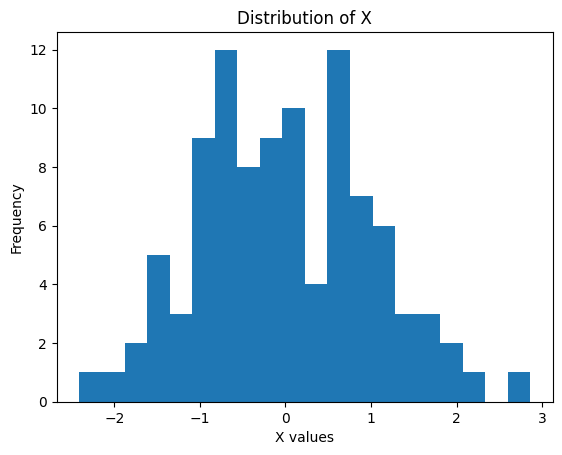

In [6]:
# prompt: graph OF DISTRIBUTIONfor X

import matplotlib.pyplot as plt

plt.hist(X[:,0], bins=20)
plt.xlabel("X values")
plt.ylabel("Frequency")
plt.title("Distribution of X")
plt.show()


In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, Y, theta):
    m = len(Y)
    h = sigmoid(X.dot(theta))
    cost = -1/m * (Y.T.dot(np.log(h)) + (1 - Y).T.dot(np.log(1 - h)))
    return cost[0][0]

In [8]:
def gradient_descent(X, Y, alpha=0.1, num_iters=1000):
    m, n = X.shape
    X = np.hstack((np.ones((m, 1)), X))
    theta = np.zeros((n + 1, 1))
    cost_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta))
        gradient = X.T.dot(h - Y) / m
        theta -= alpha * gradient
        cost = compute_cost(X, Y, theta)
        cost_history.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")

    return theta, cost_history

In [9]:
def plot_cost(cost_history, label):
    plt.plot(range(len(cost_history)), cost_history, label=label)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Cost Function vs Iteration")
    plt.legend()
    plt.grid(True)
    plt.show()


In [10]:
def plot_decision_boundary(X, Y, theta):
    plt.figure()
    for i in range(len(Y)):
        if Y[i] == 0:
            plt.plot(X[i][0], X[i][1], 'ro')
        else:
            plt.plot(X[i][0], X[i][1], 'bo')

    x_values = [np.min(X[:, 0] - 1), np.max(X[:, 0] + 1)]
    y_values = -(theta[0] + theta[1] * np.array(x_values)) / theta[2]
    plt.plot(x_values, y_values, label="Decision Boundary")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Data and Decision Boundary")
    plt.legend()
    plt.grid(True)
    plt.show()

In [11]:
def predict(X, theta):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return sigmoid(X.dot(theta)) >= 0.5

def confusion_metrics(Y, Y_pred):
    TP = np.sum((Y == 1) & (Y_pred == 1))
    TN = np.sum((Y == 0) & (Y_pred == 0))
    FP = np.sum((Y == 0) & (Y_pred == 1))
    FN = np.sum((Y == 1) & (Y_pred == 0))

    accuracy = (TP + TN) / len(Y)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * precision * recall / (precision + recall)

    print(f"Confusion Matrix:\nTP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1_score:.4f}")

Iteration 0, Cost: 0.6703199764101024
Iteration 100, Cost: 0.2811705996198953
Iteration 200, Cost: 0.24919228359597403
Iteration 300, Cost: 0.23826092962711184
Iteration 400, Cost: 0.23312130908956086
Iteration 500, Cost: 0.23031760908133225
Iteration 600, Cost: 0.22865045367728265
Iteration 700, Cost: 0.22760196696353435
Iteration 800, Cost: 0.22691625938907728
Iteration 900, Cost: 0.22645477174975845
Final Cost (alpha=0.1): 0.22614000056086006


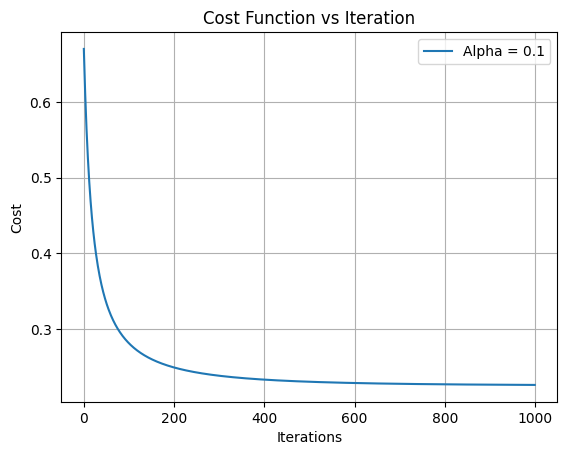

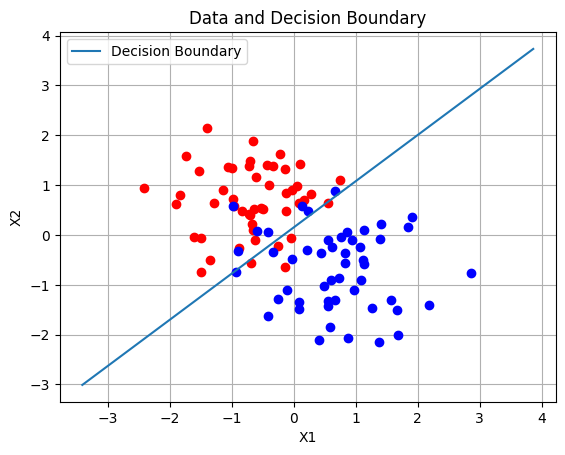

Confusion Matrix:
TP: 43, TN: 44, FP: 5, FN: 7
Accuracy: 0.8788
Precision: 0.8958
Recall: 0.8600
F1 Score: 0.8776


In [12]:
theta_01, cost_01 = gradient_descent(X, Y, alpha=0.1, num_iters=1000)
print(f"Final Cost (alpha=0.1): {cost_01[-1]}")
plot_cost(cost_01, label="Alpha = 0.1")
plot_decision_boundary(X, Y, theta_01)
Y_pred_01 = predict(X, theta_01)
confusion_metrics(Y, Y_pred_01)

In [13]:
theta_01_short, cost_01_short = gradient_descent(X, Y, alpha=0.1, num_iters=100)
theta_5, cost_5 = gradient_descent(X, Y, alpha=5, num_iters=100)

Iteration 0, Cost: 0.6703199764101024
Iteration 0, Cost: 0.24766587584971164


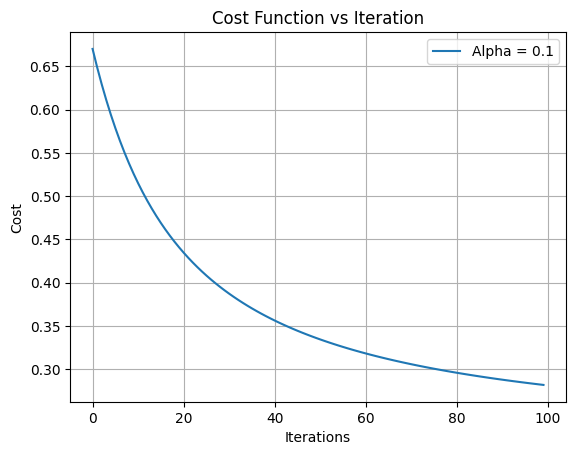

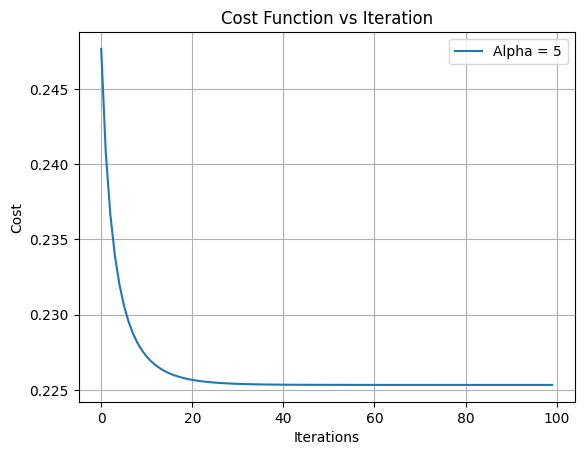

In [14]:
plot_cost(cost_01_short, label="Alpha = 0.1")
plot_cost(cost_5, label="Alpha = 5")


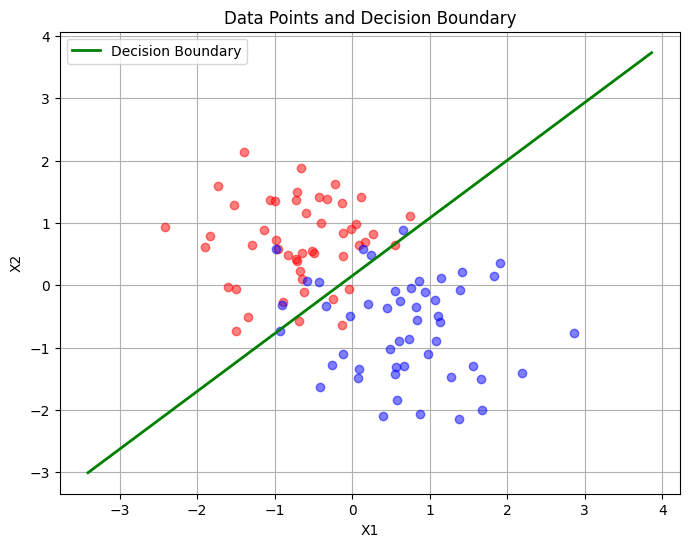

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X[i, 0], X[i, 1], 'ro', alpha=0.5)  # Red for class 0
    else:
        plt.plot(X[i, 0], X[i, 1], 'bo', alpha=0.5)  # Blue for class 1
x_values = [np.min(X[:, 0] - 1), np.max(X[:, 0] + 1)]
y_values = -(theta_01[0] + theta_01[1] * np.array(x_values)) / theta_01[2]
plt.plot(x_values, y_values, 'g-', linewidth=2, label='Decision Boundary')


plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Data Points and Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()
